In [1]:
import mysql.connector
import pandas as pd

# Connect to the MySQL database
cnx = mysql.connector.connect(
    host='localhost',
    user='root',
    password='hannibal1999',
    database='lotech'
)
cursor = cnx.cursor()

query = """
SELECT
    B.id AS branch_id,
    B.branch_name,
    COUNT(O.id) AS count_sales,
    COUNT(O.id) / (SELECT COUNT(*) FROM Orders) AS market_share,
    COUNT(O.id) / DATEDIFF(CURDATE(), MIN(O.date)) AS avg_sales_per_day
FROM
    Branches B
LEFT JOIN
    Orders O ON B.id = O.branch_id
GROUP BY
    B.id,
    B.branch_name
Order by count_sales desc
;
"""
cursor.execute(query)
rows = cursor.fetchall()
cursor.close()
cnx.close()

In [2]:
import numpy as np 


In [3]:
df = pd.DataFrame(rows , columns=['branch_id' , 'branch_name' , 'count_sales' , 'market_share' , 'avg_sales_per_day'])
population = [ 8693706 ,1961260 , 3001184 ,1592492 ,554406 , 1565572,520994,736224 ,946651 ,679995 ,309830 ,1558693 ,1184788 ,529673 ,39853 , 430871]
population = pd.DataFrame(population , index=['Tehran', 'Isfahan', 'Mashhad', 'Karaj', 'Hamedan', 'Shiraz',
       'Arak', 'Orumiyeh', 'Kermanshah', 'Rasht', 'Sari', 'Tabriz',
       'Ahvaz', 'Yazd', 'Kish', 'Zanjan'] )
population.rename(columns={0 : 'population'} , inplace=True)
population = population.rename_axis('branch_name').reset_index()
population

,branch_name,population
0,Tehran,8693706
1,Isfahan,1961260
2,Mashhad,3001184
3,Karaj,1592492
4,Hamedan,554406
5,Shiraz,1565572
6,Arak,520994
7,Orumiyeh,736224
8,Kermanshah,946651
9,Rasht,679995



df = df.merge(population['branch_name' , 'popluation'] , on='branch_name' , how='left')

In [4]:
df

,branch_id,branch_name,count_sales,market_share,avg_sales_per_day
0,10,Tehran,152533,0.1500,35.0248
1,9,Isfahan,101698,0.1000,23.3520
2,5,Mashhad,101684,0.1000,23.3488
3,4,Karaj,51078,0.0502,11.7286
4,1,Hamedan,50984,0.0501,11.7070
5,13,Shiraz,50939,0.0501,11.6967
6,8,Arak,50915,0.0501,11.6912
7,14,Orumiyeh,50914,0.0501,11.6909
8,2,Kermanshah,50904,0.0500,11.6886
9,3,Rasht,50851,0.0500,11.6765


In [5]:
population = [ 8693706 ,1961260 , 3001184 ,1592492 ,554406 , 1565572,520994,736224 ,946651 ,679995 ,309830 ,1558693 ,1184788 ,529673 ,39853 , 430871]
df['population'] = population
df
df['market_capacity'] = df['count_sales'] / df['population']
# Order the DataFrame by 'population' descending and 'market_capacity' ascending
df = df.sort_values(['population', 'market_capacity'], ascending=[False, True])
df['population_by_market_capacity'] = df['population']/ df['market_capacity']

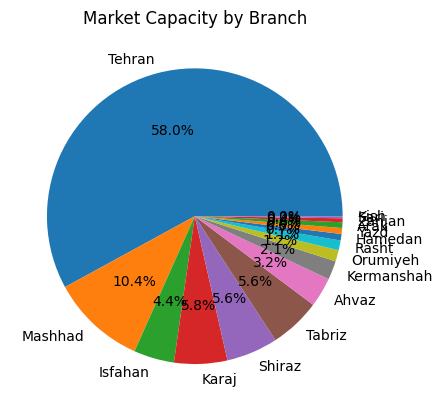

In [6]:
import matplotlib.pyplot as plt
plt.pie( df['population_by_market_capacity'] , labels=df['branch_name'], autopct='%1.1f%%')
plt.title('Market Capacity by Branch')
plt.show()


In [7]:
df.to_csv("request_1.csv", index=False)